<a href="https://colab.research.google.com/github/RafaRomero8/Baggin-y-Boosting/blob/main/bagging_boosting_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Técnicas avanzadas para ciencia de datos y empleabilidad**
## **Ensambles**



# Ensambling

Hasta este punto te habrás dado cuenta que elegir un modelo para ponerlo «en producción» puede implicar bastantes formas de hacerlo, es decir, que para cada uno de los modelos que hemos hecho, las variables (alphas, betas, entre otras) puede ser bastantes, sino es que en algunos casos infinitas.

A veces, seleccionar solo un modelo o unos valores fijos establecidos no es la forma más óptima de trabajar, de hecho seleccionar un solo modelo para predecir con muy alta precisión es complicado. Por ello, nos basaremos en otra herramienta del aprendizaje automático: los **ensambles** (_ensemble_, en inglés), que buscarán principalmente disminuir la varianza, subir la precisión y evitar los sesgos.

Antes de entender esto con métodos técnicos, vamos a analizar una analogía:

Imagina que quieres comprar un coche, aunque no tienes claro si quieres comprar uno usado, que es muy barato, un seminuevo, que tiene un costo más alto, o uno nuevo, la opción más costosa. Algo que te empuja a decidir sobre el usado o el seminuevo es que el usado cuenta con características que el nuevo no tiene. Ante tantas decisiones, prefieres preguntar a un amigo cercano, a un mecánico de confianza y consultarlo en internet.

Pues bien, con base en lo que te indiquen estas tres fuentes, tomarás la decisión que más te convenga.


## Métodos de ensamble

En esta ocasión, veremos los dos métodos de ensamble más conocidos y que mejores resultados han dado. Por lo general, a estos modelos se les conoce como **metaestimadores**.

### Bagging

Viene de la palabra _**b**ootstrap **agg**regation_. Este método requiere que haya varios algoritmos corriendo en paralelo: cada uno seleccionará el modelo que mejor desempeño tenga y, al final, al juntar los distintos modelos que se han armado, se seleccionará aquel con «más votos» o el que seleccione algún algoritmo de ciencia de datos.

Vamos a comparar este método con el ejemplo del coche que quieres comprar. 

Como mencionamos, quieres adquirir un vehículo, tienes tres opciones distintas y quieres consultarlo de tres formas diferentes. En cada una de las consultas le preguntas al entrevistado (el amigo, el mecánico e internet) por cuál de los tres coches vota (el usado, el seminuevo o el nuevo). El amigo te dijo que compres el seminuevo bajo los argumentos que él considera importantes; el mecánico indica que ve más factible la compra del seminuevo, e internet te indica que es mejor el nuevo. El siguiente paso es contar los votos: dos para el seminuevo, uno para el nuevo y ninguno para el usado. Tu decisión final es comprar el vehículo seminuevo.

Ahora, este mismo pensamiento vamos a plasmarlo en nuestro lenguaje de la ciencia de datos:

Primero, tenemos nuestro conjunto de entrenamiento. Lo que se hace con este método es dividirlo entre la cantidad de algoritmos de _machine learning_ que queremos evaluar, esto es, si queremos evaluar tres modelos, se tendrán que dividir el conjunto de entrenamiento en tres partes; pero el hecho de que un dato sea usado en el primer modelo no quiere decir que no pueda usarse en el segundo o el tercero, en otras palabras, aunque se armen distintos conjuntos de entrenamiento, los valores se pueden duplicar en otros conjuntos.

Es importante considerar que la división del conjunto de entrenamiento con distintos valores permitirá no solo que apliquemos modelos distintos, sino que puede usarse el mismo modelo y dará un resultado diferente, ya que hay una variación en el conjunto que está entrenando ese modelo.

Luego, cada modelo tendrá un resultado, el cual, a su vez, se evaluará con los distintos métodos para considerar el más correcto; finalmente, se seleccionará aquel que tenga el mejor desempeño.

![Bagging](https://drive.google.com/uc?export=view&id=1QhUqtAy8dnMUTY64deXRxis8GoJIHd96)


Para aplicar cualquiera de los métodos, primero debemos llevar a cabo los pasos del preprocesado, esto incluye dividir los métodos de entrenamiento y de _testing_. Por esta razón, usaremos las paqueterías que ya conocemos.

In [12]:
#Librerías que solemos usar para la manipulación de información y para graficar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

De igual manera, y como se indicó previamente, usaremos las funciones `train_test_split`, y para medir la precisión del modelo usaremos `accuracy_score`, ambos de **sklearn**.

In [13]:
from sklearn.model_selection import train_test_split #para entrenar el modelo
from sklearn.metrics import accuracy_score #metricas

Ahora te daremos un _tip_ que podría funcionar para que practiques distintos modelos de ciencia de datos.

**Seaborn** es una paquetería que permite hacer gráficos y diagramas usando como base **Pyplot**, solo que su enfoque se hace sobre _datasets_ de **Pandas**. No obstante, **Seaborn** proporciona algunos _datasets_ para probar las distintas gráficas o bien para analizarlas.

Para conocer los _datasets_ disponibles en tu código, escribe lo siguiente: 
```python
sns.get_dataset_names()
``` 
(Obviamente, después de importar **Seaborn** y darle el alias `sns`). Mira el ejemplo siguiente y observa los resultados:

In [ ]:
sns.get_dataset_names() #tomamos datos o un datasetde seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

La única forma de conocer los datos es explorando los _datasets_ por tu cuenta.

Una vez seleccionados los datos, deberemos indicarlos de la siguiente forma:
```python
sns.load_dataset('<nombre_del_dataset>')
```
En el código que sigue hemos creado un objeto (un _dataframe_ de **Pandas**) llamado `df`, hemos borrado valores `NA` que existan en cualquier fila con `.dropna()` y hemos observado los primeros cinco valores con `.head(5)`.

In [39]:
df = sns.load_dataset('penguins').dropna()#nos quedamos con valores completos
df.head(5)
#nota:importante hacer EDA  
#SI HAY MAS DE 60% de datos recomendable quedartelos y hacer una imputacion 
#si hay menos de 60% de los datos o mas de 40% en una variable podemos quitarla ya que 
#no nos proporciona información

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Siempre que analices un conjunto de datos usa `.dtypes` (sin paréntesis) para saber si hablamos de flotantes, enteros o valores categóricos, estos últimos mostrados como `object`. 

In [ ]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

En este nivel ya debes saber que para entrenar valores categóricos es necesario que a estos se les asigne un número: el _dataset_ de `pinguins`, que estamos usando de ejemplo, tiene la columna `sex`, que hace referencia al sexo del pingüino analizado, y tiene como posibles resultados `Male` o `Female`. Si convertimos estas etiquetas a números, a `Female` se le asignará `0` mientras que a `Male` se le asignará `1`. 

Esto permitirá que podamos usar las herramientas de **Sklearn** en el conjunto de datos.

Para esto usaremos `LabelEncoder` y con el siguiente código automáticamente transformaremos todas las columnas que sean valores categóricos a números.


In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()#nos convierte la columna en numerico,en una etiquet

for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder.fit_transform(list(df[col].values))#toma los valores de las columnas
        df[col] = label_encoder.transform(df[col].values)#los transforma y los agrega  a su columnacorrespondiente

In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Observando el código de arriba, vemos que el bucle analiza una a una las columnas de `df` (`for col in df.columns:`); después de esto, si la columna analizada tiene con `.dtype` el valor `'object'`, entonces se aplicará `LabelEncoder`, el cual, como la mayoría de las funciones de **Sklearn**, requiere entrenarse con `fit_transform`.

Podemos ver los resultados con `.head()` o `.tail()`.

In [ ]:
df.head()
#nos convierte la columna en numeros es decir
#0 para la primera categoria ,1 para la segunda categoria etc.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


Podemos usar el mapa de calor de **Seaborn** para ver la relación entre las variables.

¿Recuerdas qué código se puede usar para tener este resultado solo con texto?

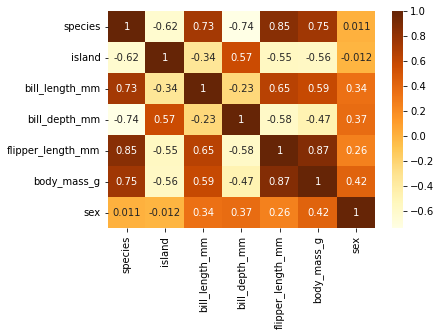

In [ ]:
sns.heatmap(
    df.corr(), annot= True, cmap= 'YlOrBr'
    )
#correlacion entre las variables

Si a la pregunta anterior has contestado con `.corr()`, estás en lo correcto.

In [ ]:
df.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
bill_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
bill_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


Se puede sugerir ver el resultado de las demás variables en la variable objetivo (en nuestro ejemplo, `species`, ya que se trata de un problema de clasificación).

Podemos potencializar ese análisis usando `.sort_values(ascendign= False)`, para mostrar la correlación de mayor a menor.

> **NOTA**: No olvides qué valores cercanos a `1` están fuertemente correlacionados: si es `+1`, es una fuerte correlación positiva, mientras que `-1` es una fuerte correlación inversa. Por tanto, la forma en la que se muestra la información no quiere decir que el valor al fondo de la lista sea el que menor correlación tiene, sino que podría ser mayor la correlación inversa.

In [ ]:
df.corr()['species'].sort_values(ascending= False)
#correlaciones entre la variable species con las demas variables


species              1.000000
flipper_length_mm    0.850737
body_mass_g          0.750434
bill_length_mm       0.730548
sex                  0.010964
island              -0.622428
bill_depth_mm       -0.740346
Name: species, dtype: float64

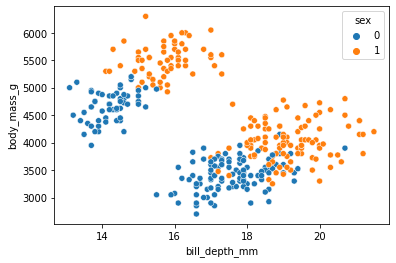

In [ ]:
sns.scatterplot(x=df['bill_depth_mm'],y=df['body_mass_g'],hue=df['sex'])


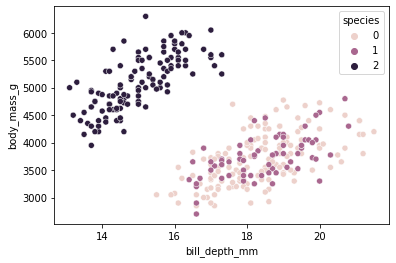

In [ ]:
sns.scatterplot(x=df['bill_depth_mm'],y=df['body_mass_g'],hue=df['species'])
#probelma dde clasificacion ,cómo separar las especies

Ahora es más fácil determinar cuáles son las variables independientes ($X$) y cuál es el objetivo ($y$).

In [41]:
X = df[['flipper_length_mm',
        'flipper_length_mm',
        'body_mass_g',
        'bill_length_mm',
        'island',
        'bill_depth_mm']]#variables dependientes

y = df['species']#variable independiente o variable objetivo

#preparamos nuestros datos

Si en algún momento tienes duda, no olvides usar `.shape` para esta seguro que miden lo mismo y que `y` es un valor adimensional.

> **NOTA**: No es lo mismo `(100, 1)` que `(100,)`.

In [ ]:
X.shape, y.shape

((333, 6), (333,))

Listo, ahora partamos en conjuntos de entrenamiento y de prueba:

In [ ]:
#dividimos nuestro data train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.20,#tamaño de 20% para prueba
    random_state= 19,
    stratify = y #ayuda para cuando los datos estan muy desvalanceados
    #en nuesro caso estan balanceados
)

In [ ]:
df['species'].value_counts()
#146 especies son de la clase 0
#68 especies son de la clase 1
#119 especies son de la clase 2

0    146
2    119
1     68
Name: species, dtype: int64

In [ ]:
df['species'].value_counts(normalize=True)
#tenemos un 43% para la categoria 0 
#tenemos un 35% para la categoria 2

0    0.438438
2    0.357357
1    0.204204
Name: species, dtype: float64

Este ejemplo es de clasificación, por lo que usaremos `BaggingClassifier`; para regresión, debe usarse `BaggingRegressor`.

La ventaja del modelo **bagging** es que podemos usar cualquier modelo de clasificación para utilizarlo. Como se comentó, el modelo que importaremos dividirá de manera automática el conjunto de entrenamiento en subconjuntos, a los cuales entrenará de forma independiente para finalmente «votar» por aquel que dé mejor resultado.

Vamos a usar `KNeighborsClassifier` para este primer ejemplo. Lo que haremos es utilizar **KNN** como lo usaríamos si fuera entrenado como ya sabemos. Para el segundo ejemplo usaremos **bagging**.

In [14]:
#nuestros modelos
from sklearn.neighbors import KNeighborsClassifier #k vecinos
from sklearn.ensemble import BaggingClassifier # nuestro primer modelo de enzamblado

El siguiente código es muy sencillo, ya que es el modelo entrenado que predice los valores para finalmente indicarnos su _accuracy_.

In [ ]:
model1 = KNeighborsClassifier().fit(X_train, y_train)#activar el modelo  de nuestros datos
model1_predict = model1.predict(X_test)#hacemos prediccion sobre test
print('El Accuracy usando KNN es de: {}'.format(accuracy_score(model1_predict, y_test)))


El Accuracy usando KNN es de: 0.75


In [15]:
from sklearn.metrics import confusion_matrix

In [ ]:
model1_predict#que es nuestra y que se esta prediciendo a partir de X_test
#se hace la clasificación

array([2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0])

In [ ]:
cm = confusion_matrix(y_test,model1_predict)
cm
#24 son del grupo 0,se clasificaron 24 correctamente y se equivoco en 9
#2 son de la clase 1
#3 de la clase 2


array([[30,  3,  4],
       [11,  3,  3],
       [ 0,  0, 30]])

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

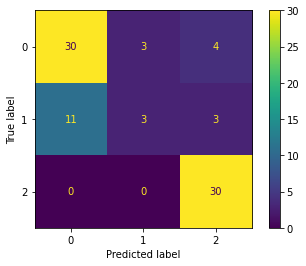

In [ ]:
ConfusionMatrixDisplay(cm).plot()

Haremos lo mismo, pero esta vez aplicando **bagging**.

In [ ]:
#genera distintas combinaciones
model2 = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                           n_estimators= 500,#500 modelos distintos por vecinos cercanos
                           random_state= 19).fit(X_train, y_train)

Como verás, este objeto requiere que indiquemos algunos valores:

- `base_estimator`: aquí señalaremos el modelo base que usaremos, el cual será **KNN**; es importante colocar el objeto: como este es importado de **Sklearn**, por lo tanto, no entrenado, deberá tener los paréntesis, y si es necesario indicar adentro algunos argumentos, estos deben ser mencionados.
- `n_estimators`: debemos señalar cuántos subconjuntos hará el _bagging_. Recuerda: dentro de estos pequeños conjuntos, los valores se pueden repetir. Esto no quiere decir que porque tienes 200 elementos y digas que quieres 50 estimadores, cada uno será de cuatro; _bagging_ seleccionará cuántos elementos son los más óptimos.
- `random_state`: esta es la semilla y solo sirve para que cada vez que corramos el código siempre dé los mismos resultados, ignorando su naturaleza aleatoria.

Como en el código anterior, haremos una predicción y veremos su _accuracy_.

In [ ]:
model2_predict = model2.predict(X_test)
print('El Accuracy usando Bagging con KNN es de: {}'.format(accuracy_score(model2_predict, y_test)))

El Accuracy usando Bagging con KNN es de: 0.7261904761904762


In [ ]:
cm_2 = confusion_matrix(y_test,model2_predict)
cm_2

array([[24,  2,  3],
       [11,  1,  2],
       [ 0,  0, 24]])

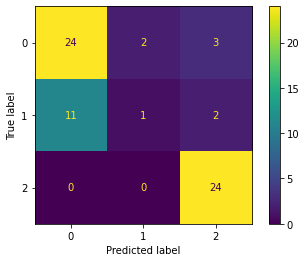

In [ ]:
ConfusionMatrixDisplay(cm_2).plot()

Apenas el modelo mejoró un poco más. El siguiente código hará lo mismo, pero usando `DecisionTreeClasifier`:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier().fit(X_train, y_train)#nuestro modelo 3
model3_predict = model3.predict(X_test)
print('El Accuracy usando Decition Tree es de: {}'.format(accuracy_score(model3_predict, y_test)))

#nuevmente utilizamos bagging
model4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators= 100,
                           random_state= 19).fit(X_train, y_train)
model4_predict = model4.predict(X_test)
print('El Accuracy usando Bagging con Decition Tree es de: {}'.format(accuracy_score(model4_predict, y_test)))


El Accuracy usando Decition Tree es de: 0.9880952380952381
El Accuracy usando Bagging con Decition Tree es de: 0.9761904761904762


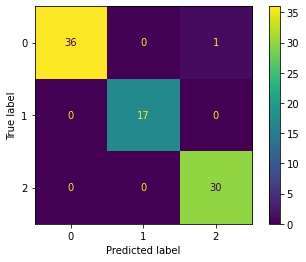

In [ ]:
cm_3 = confusion_matrix(y_test,model3_predict)
ConfusionMatrixDisplay(cm_3).plot()

Observa cómo el resultado en el _**bagging**_ con _**decision tree**_ da como resultado `1.0`. Es evidente que es un problema de _overfitting_. Ten cuidado con este tipo de resultados.

### **Boosting**

El método de _**boosting**_ es una técnica de ensamble en aprendizaje automático en la cual varios modelos débiles son entrenados para combinarse y producir un modelo más fuerte. Los modelos débiles son generalmente algoritmos simples, como árboles de decisiones, mientras que el modelo final es una combinación ponderada de estos modelos débiles. La idea detrás del _boosting_ es que cada modelo débil corrige los errores cometidos por los modelos anteriores en el ensamble, lo que finalmente conduce a un modelo más preciso.

Veámoslo con el ejemplo del coche que queremos comprar. El escenario es el mismo: quieres adquirir un vehículo pero no sabes cuál, por ello te asesorarás con un mecánico, un amigo y en internet.

A diferencia del _bagging_, en el que preguntábamos en paralelo y cuestionábamos a cada consultor de forma independiente, este método exige que se haga en serie, o sea, uno tras otro. Primero consultamos en internet y tomamos nota de cuál es su consejo de compra, luego compartimos ese resultado con nuestro amigo, quien nos da su retroalimentación, la cual volvemos a anotar, y finalmente compartimos esas notas con el mecánico para tomar una decisión final.

Como has visto en el ejemplo anterior, son varios modelos, uno tras otro, los cuales van mejorando los resultados.

![Boosting](https://drive.google.com/uc?export=view&id=194suXUZgz1SxvHiZnyqg2HIKsZm4FBxc)

Para ejecutar este método, básicamente se siguen los mismo pasos que el _bagging_, solo que usaremos paquetes distintos.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier#este modelo es muy poderoso para clasificaciones
#xgboost x es de eXtreme de velocidad
#hace una transformacion de optimizacion 

También existe una versión para modelos de regresión, llamada `ensemble.GradientBoostingRegressor`, aunque vale la pena indicar algunos aspectos. Este algoritmo funciona construyendo una secuencia de árboles de decisiones débiles, por lo que no utiliza otro tipo de algoritmo. Es opcional indicar el **gradiente de la función de pérdida** y de esta forma se podrá gestionar una mejora entre modelo y modelo.





In [ ]:
model5 = GradientBoostingClassifier(n_estimators=20, random_state= 19).fit(X_train, y_train)
#n_estimators es el numero de modelos conectados entre si,en este caso 20 modelos
#fit para activar el modelo

En nuestro ejemplo indicaremos 50 estimadores, es decir, los modelos conectados en serie. Si gustas, puedes indicar parámetros como profundidad de los árboles o la tasa de aprendizaje. En nuestro ejemplo los omitiremos.

La predicción se hace como cualquier algoritmo de la paquetería de **Sklearn**.

In [ ]:
model5_predict = model5.predict(X_test)
print('El Accuracy usando Boosting es de: {}'.format(accuracy_score(model5_predict, y_test)))


El Accuracy usando Boosting es de: 0.9850746268656716


In [ ]:
cm_5 = confusion_matrix(y_test,model5_predict)
cm_5

array([[28,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 24]])

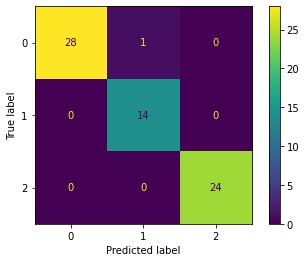

In [ ]:
cm_4 = confusion_matrix(y_test,model5_predict)
ConfusionMatrixDisplay(cm_4).plot()

Nota que el resultado es `1.0`, lo que no es bueno ver, pero esto se debe a que el modelo revisado es muy pequeño, por lo que la aplicación del algoritmo está generando un sobreajuste.

Vamos a generar un _dataset_ ficticio que nos ayudará a practicar. Para eso usaremos el siguiente código:

In [5]:
from pandas.core.arrays.sparse import array
import pandas as pd
from sklearn.datasets import make_classification
#set de datos con datos sinteticos
array_sample = make_classification(n_samples= 2000, #2000 registros
                                   n_features= 7, #7 variables
                                   n_classes= 4, #4 clases
                                   n_informative=3,#3 datos informativos ,que si tenen informacion
                                   random_state= 19)
#convertimos a dtaframe
df_sample = pd.DataFrame(array_sample[0], 
                         columns=[
                             'Feature 1', 
                             'Feature 2',
                             'Feature 3',
                             'Feature 4',
                             'Feature 5',
                             'Feature 6',
                             'Feature 7',
                             ])
#agregamos la columna label
df_sample['Label'] = array_sample[1]

In [6]:
df_sample.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Label
0,1.248399,0.288446,0.989781,1.134189,0.471949,-0.606530,0.751970,1
1,2.461419,0.519658,-1.808511,-1.158262,1.473645,-1.772564,-0.261430,1
2,-0.682646,-0.554511,-0.525250,0.882634,0.868396,-0.874409,-0.198417,0
3,-0.798854,-1.136716,-0.918318,-2.751196,0.232908,-0.181391,-1.608111,1
4,-0.450719,-0.052984,-0.435610,-0.136504,-1.396533,1.529541,0.352649,2


In [7]:
df_sample['Label'].value_counts()
#tenemos 4 categorias de manera uniforme

0    506
3    501
2    500
1    493
Name: Label, dtype: int64

# Exploración de Datos

In [ ]:
df_sample.describe().T
#Observar nuestro datos

,count,mean,std,min,25%,50%,75%,max
Feature 1,2000.0,0.014081,1.447860,-4.612780,-1.084928,0.059513,1.101048,4.371746
Feature 2,2000.0,-0.005331,1.001797,-3.640297,-0.684929,0.026174,0.677553,2.716159
Feature 3,2000.0,-0.029279,0.980184,-3.291802,-0.715055,-0.034207,0.634536,3.597676
Feature 4,2000.0,-0.008707,1.429820,-5.029554,-1.083515,-0.124822,1.014670,4.781482
Feature 5,2000.0,0.004717,1.290136,-3.814748,-0.948596,-0.054358,0.963934,3.937516
Feature 6,2000.0,-0.006168,1.385875,-3.903694,-1.053107,0.050360,1.018458,4.211266
Feature 7,2000.0,-0.000909,0.964687,-3.801738,-0.634989,-0.033582,0.597099,3.103943
Label,2000.0,1.498000,1.121439,0.000000,0.000000,2.000000,3.000000,3.000000


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  2000 non-null   float64
 1   Feature 2  2000 non-null   float64
 2   Feature 3  2000 non-null   float64
 3   Feature 4  2000 non-null   float64
 4   Feature 5  2000 non-null   float64
 5   Feature 6  2000 non-null   float64
 6   Feature 7  2000 non-null   float64
 7   Label      2000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 125.1 KB


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 7'>

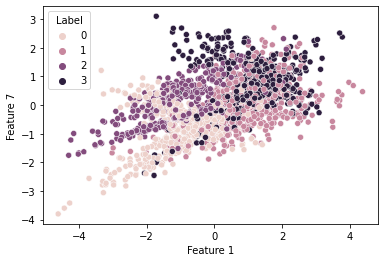

In [ ]:
sns.scatterplot(x='Feature 1',y='Feature 7',hue='Label',data=df_sample)

<AxesSubplot:xlabel='Feature 2', ylabel='Feature 7'>

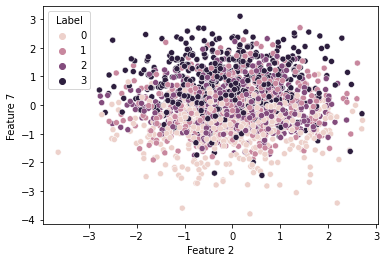

In [ ]:
sns.scatterplot(x='Feature 2',y='Feature 7',hue='Label',data=df_sample)


# Preparar datos de entrenamiento y prueba al .25(test)

In [8]:
X = df_sample.drop('Label',axis=1)
#df_sample.drop(columns=['Label'])

In [9]:
y=df_sample[['Label']]

In [11]:
#dividimos nuestro data train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.25,#tamaño de 20% para prueba
    random_state= 19,
    stratify = y #ayuda para cuando los datos estan muy desvalanceados
    #en nuesro caso estan balanceados
)

# Probar con Baggin con DecitionTree y Boosting

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators= 100,
                           random_state= 19).fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.metrics import accuracy_score #metricas

model_bagging_predict = model_bagging.predict(X_test)
print('El Accuracy usando Bagging con Decition Tree es de: {}'.format(accuracy_score(model_bagging_predict, y_test)))


El Accuracy usando Bagging con Decition Tree es de: 0.862


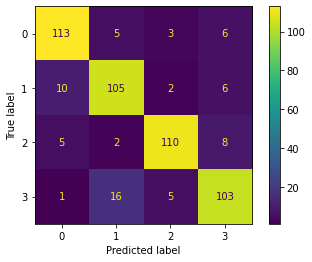

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

c_bagging = confusion_matrix(y_test,model_bagging_predict)
ConfusionMatrixDisplay(c_bagging).plot()
#tiene un precision del 86% lo que no esta tan mal el modelo

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model_boosting = GradientBoostingClassifier(n_estimators=50, random_state= 19).fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
model_boosting_predict = model_boosting.predict(X_test)
print('El Accuracy usando Boosting es de: {}'.format(accuracy_score(model_boosting_predict, y_test)))


El Accuracy usando Boosting es de: 0.844


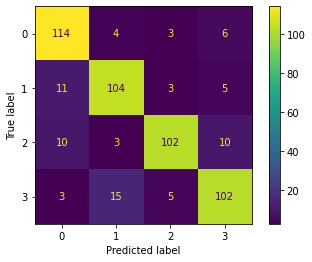

In [20]:
c_boosting = confusion_matrix(y_test,model_boosting_predict )
ConfusionMatrixDisplay(c_boosting).plot()

In [21]:
import pickle
#Guardamos nuestro modelo
filename = 'model_bagging.sav'#nuestro archivo del modelo que resulto del entrenamiento 
pickle.dump(model_bagging,open(filename,'wb'))

In [22]:
#cargar el modelo,solo se manda a llamar el modelo
loaded_model = pickle.load(open(filename,'rb'))

In [23]:
X_test.tail(1)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7
868,1.035421,-0.644404,0.028982,1.629294,0.365133,-0.475741,0.943155


In [24]:
#le pasamos la informacion de nuestro modelo
loaded_model.predict(X_test.tail(1))#predicción,nos indica que para dichos datos(X_test.tail(1))
#pertenece a la clase 1 o etiqueta 1

array([1])

In [38]:
fila_14 = X_test.iloc[[14]]#seleccionamos una fila al azar
fila_14

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7
1305,2.65057,0.361761,-0.853897,0.461785,-1.062668,0.921892,1.568917


In [39]:
loaded_model.predict(fila_14)

array([3])

# ***EJERCICIO NBA***

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/dataSets/nba.csv')

In [43]:
data.head()#variable objetivo seria target
#0 gano visitante,1 gano local

,game_id,target,team1,team2,team1_odds,team2_odds,team1_odds_adjusted,team2_odds_adjusted,H_Team_Elo_Before,A_Team_Elo_Before,team1_odds_4,team1_odds_adjusted_4,score1_4,p_1_score1_4,p_2_score1_4,p_3_score1_4,p_4_score1_4,team2_odds_4,team2_odds_adjusted_4,score2_4
0,31,1,Brooklyn Nets,Golden State Warriors,1.37,3.16,1.31,3.60,1500.0,1500.0,1.86,2.280,121.0,24.0,41.0,28.0,28.0,1.27,1.26,109.0
1,32,0,Los Angeles Lakers,Los Angeles Clippers,1.73,2.12,1.74,2.15,1500.0,1500.0,3.76,3.980,89.0,27.0,28.0,14.0,20.0,1.70,1.54,121.0
2,35,1,Orlando Magic,Miami Heat,2.26,1.62,2.65,1.51,1500.0,1500.0,2.38,2.340,106.0,31.0,27.0,25.0,23.0,1.59,1.63,103.0
3,36,1,Philadelphia 76ers,Washington Wizards,1.30,3.43,1.33,3.45,1500.0,1500.0,1.56,1.555,123.5,26.0,35.5,27.0,35.0,3.77,4.41,116.0
4,34,1,Indiana Pacers,New York Knicks,1.22,4.12,1.31,3.61,1500.0,1500.0,2.28,2.505,105.0,28.5,29.0,17.5,30.0,3.35,4.37,99.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                1902 non-null   int64  
 1   target                 1902 non-null   int64  
 2   team1                  1902 non-null   object 
 3   team2                  1902 non-null   object 
 4   team1_odds             1902 non-null   float64
 5   team2_odds             1902 non-null   float64
 6   team1_odds_adjusted    1902 non-null   float64
 7   team2_odds_adjusted    1902 non-null   float64
 8   H_Team_Elo_Before      1902 non-null   float64
 9   A_Team_Elo_Before      1902 non-null   float64
 10  team1_odds_4           1902 non-null   float64
 11  team1_odds_adjusted_4  1902 non-null   float64
 12  score1_4               1902 non-null   float64
 13  p_1_score1_4           1902 non-null   float64
 14  p_2_score1_4           1902 non-null   float64
 15  p_3_

In [47]:
data['target'].value_counts()

1    1035
0     867
Name: target, dtype: int64

In [48]:
data['target'].value_counts(normalize=True)
#54% gana el local
#45% gana el visitante
#por ejemplo podemos decir que si le apostmos al local tenemos 54% de ganar

1    0.544164
0    0.455836
Name: target, dtype: float64

In [10]:
X = data.drop(columns=['game_id','target','team1','team2'])
#game_id como tal nos da informacion,quitamos los team por ahora ya que son variables discretas 
y = data['target']

<AxesSubplot:xlabel='p_1_score1_4', ylabel='p_2_score1_4'>

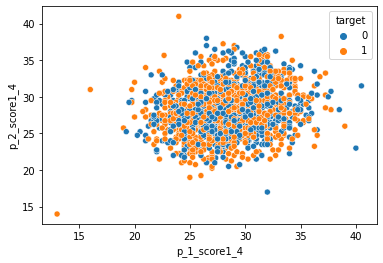

In [52]:
import seaborn as sns
sns.scatterplot(x='p_1_score1_4',y='p_2_score1_4',hue='target',data=data)
#como podemos ver nuestros datos están muy revueltos,podriamos pensar que es una clasificacion dificil

In [17]:
#dividimos nuestro data train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.20,#tamaño de 20% para prueba
    random_state= 85,
    stratify = y #ayuda para cuando los datos estan muy desvalanceados
    #en nuesro caso estan balanceados
)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_nba = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators= 100,
                           random_state= 19).fit(X_train, y_train)


In [19]:
from sklearn.metrics import accuracy_score #metricas

bagging_predict_nba = bagging_nba.predict(X_test)
print('El Accuracy usando Bagging con Decition Tree es de: {}'.format(accuracy_score(bagging_predict_nba, y_test)))

#nuestro modelo tiene un 63% de prediccion o una clasificacion de 63%
#63% es bueno para este tipo de datos o clasificacion

El Accuracy usando Bagging con Decition Tree es de: 0.6351706036745407


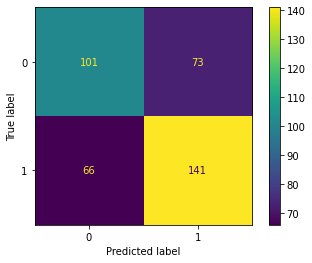

In [57]:
bagging_nba = confusion_matrix(y_test,bagging_predict_nba)
ConfusionMatrixDisplay(bagging_nba ).plot()
#187 fueron etiquetados correctamente pero 73 no(falaron)
#101 se clasifico bien pero 66 no

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model_boosting_nba = GradientBoostingClassifier(n_estimators=50, random_state= 89).fit(X_train, y_train)


In [21]:
boosting_predict_nba = model_boosting_nba.predict(X_test)
print('El Accuracy usando Boosting es de: {}'.format(accuracy_score(boosting_predict_nba, y_test)))
#podemos ver que boosting es ligeramente mejor que bagging

El Accuracy usando Boosting es de: 0.6482939632545932


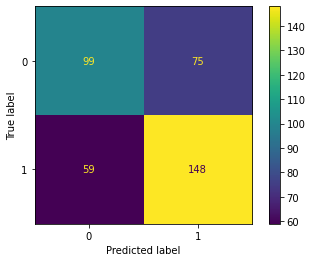

In [63]:
boosting_nba = confusion_matrix(y_test,boosting_predict_nba)
ConfusionMatrixDisplay(boosting_nba).plot()

# **Prediccion con bagging**

In [22]:
import pickle
filename_nba = 'model_nba.sav'#nuestro archivo del modelo que resulto del entrenamiento 
pickle.dump(bagging_nba,open(filename_nba,'wb'))

In [23]:

loaded_model_nba = pickle.load(open(filename_nba,'rb'))


In [29]:
fila = X_test.iloc[[28]]
fila


,team1_odds,team2_odds,team1_odds_adjusted,team2_odds_adjusted,H_Team_Elo_Before,A_Team_Elo_Before,team1_odds_4,team1_odds_adjusted_4,score1_4,p_1_score1_4,p_2_score1_4,p_3_score1_4,p_4_score1_4,team2_odds_4,team2_odds_adjusted_4,score2_4
422,1.77,2.13,1.86,2.0,1507.48522,1386.196632,2.14,2.2225,100.5,23.75,24.5,24.5,27.75,4.325,4.145,103.5


In [30]:
loaded_model_nba.predict(fila)

array([0])

# **prediccion con booosting**

In [34]:
filename_boosting_nba = 'model_boosting_nba.sav'#nuestro archivo del modelo que resulto del entrenamiento 
pickle.dump(model_boosting_nba,open(filename_boosting_nba,'wb'))

In [35]:
loaded_model__boos_nba = pickle.load(open(filename_boosting_nba,'rb'))

In [37]:
fila_boos = X_test.iloc[[28]]
fila_boos

,team1_odds,team2_odds,team1_odds_adjusted,team2_odds_adjusted,H_Team_Elo_Before,A_Team_Elo_Before,team1_odds_4,team1_odds_adjusted_4,score1_4,p_1_score1_4,p_2_score1_4,p_3_score1_4,p_4_score1_4,team2_odds_4,team2_odds_adjusted_4,score2_4
422,1.77,2.13,1.86,2.0,1507.48522,1386.196632,2.14,2.2225,100.5,23.75,24.5,24.5,27.75,4.325,4.145,103.5


In [38]:
loaded_model__boos_nba.predict(fila_boos)

array([1])